# LSTM Based Model for predicting sunspots from 1818 to present year
Hope you like my work, This is my first implementation of RNN's so do upvote my notebook!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
df = pd.read_csv('../input/daily-sun-spot-data-1818-to-2019/sunspot_data.csv')
df.head()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1


In [3]:
missing_vals = df.isnull().sum()
missing_vals

Unnamed: 0                  0
Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

# Simple Feature Engineering

In [4]:
df.describe()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,36858.500000,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,21280.697909,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,0.000000,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,18429.250000,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,36858.500000,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,55287.750000,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,73717.000000,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


In [5]:
corr_df = df.corr()
corr_df

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
Unnamed: 0,1.000000,0.999988,0.002871,0.000458,1.000000,0.128850,-0.149075,0.638699,-0.070691
Year,0.999988,1.000000,-0.002064,-0.000006,0.999988,0.128837,-0.149085,0.638723,-0.070575
Month,0.002871,-0.002064,1.000000,0.010570,0.002871,0.002993,0.002403,-0.005204,-0.023447
Day,0.000458,-0.000006,0.010570,1.000000,0.000459,-0.002208,-0.005698,-0.000928,-0.000691
Date In Fraction Of Year,1.000000,0.999988,0.002871,0.000459,1.000000,0.128850,-0.149076,0.638695,-0.070691
Number of Sunspots,0.128850,0.128837,0.002993,-0.002208,0.128850,1.000000,0.837165,-0.028468,0.041408
Standard Deviation,-0.149075,-0.149085,0.002403,-0.005698,-0.149076,0.837165,1.000000,-0.147914,0.058801
Observations,0.638699,0.638723,-0.005204,-0.000928,0.638695,-0.028468,-0.147914,1.000000,-0.148822
Indicator,-0.070691,-0.070575,-0.023447,-0.000691,-0.070691,0.041408,0.058801,-0.148822,1.000000


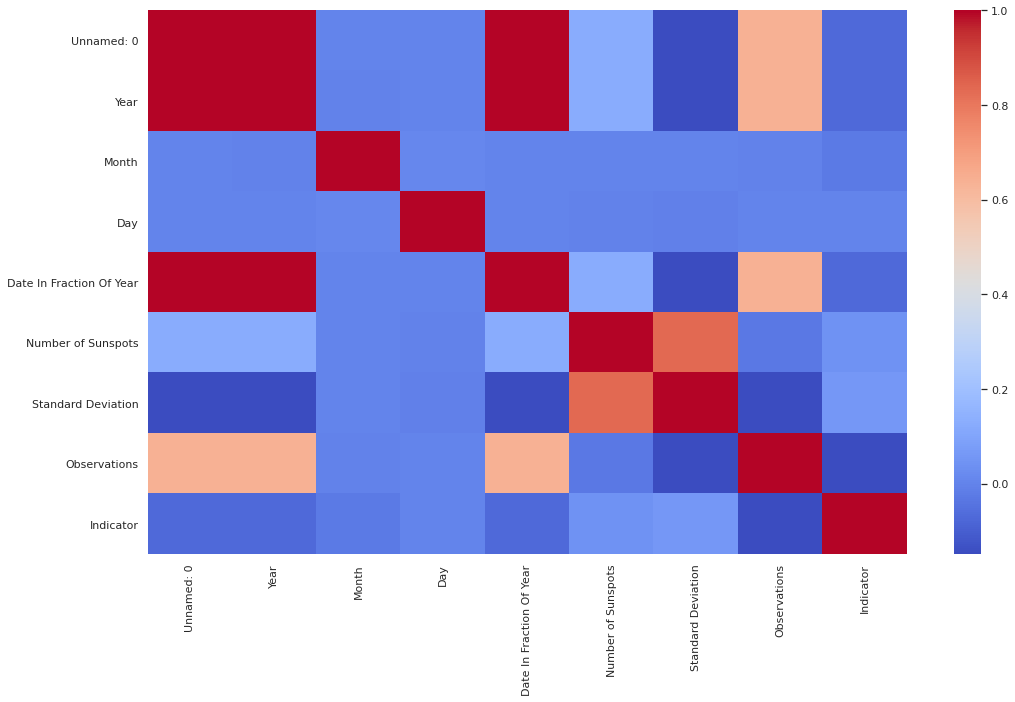

In [6]:
plt.figure(figsize=(17,10))
sns.heatmap(corr_df, cmap='coolwarm')

# Creating Sequences for Time Series Forecast

In [7]:
df_train = df[df['Year']<2000]
df_test = df[df['Year']>=2000]

spots_train = df_train['Number of Sunspots'].tolist()
spots_test = df_test['Number of Sunspots'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))

Training set has 66474 observations.
Test set has 7244 observations.


In [8]:
def create_sequence(seq, obs):
    x = []
    y = []
    for i in range(len(obs)-size_sample):
        #print(i)
        window = obs[i:(i+size_sample)]
        after_window = obs[i+size_sample]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
    
size_sample = 15
x_train,y_train = create_sequence(size_sample,spots_train)
x_test,y_test = create_sequence(size_sample,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (66459, 15, 1)
Shape of test set: (7229, 15, 1)


In [9]:
x_train[0:10]

array([[[ -1],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 65],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 37],
        [ -1],
        [ -1]],

       [[ -1],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 65],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 37],
        [ -1],
        [ -1],
        [ -1]],

       [[ -1],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 65],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 37],
        [ -1],
        [ -1],
        [ -1],
        [ 77]],

       [[ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 65],
        [ -1],
        [ -1],
        [ -1],
        [ -1],
        [ 37],
        [ -1],
        [ -1],
        [ -1],
        [ 77],
        [ 98]],

       [[ -1],
        [ -1],
        [ -1],
        [ 65],
        [ -1],
        [ -1],
  

# Model Development

In [10]:
model = Sequential()
model.add(LSTM(128, dropout=0.0, recurrent_dropout=0.0, input_shape = (None,1)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredLogarithmicError())
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 1e-3,
                               patience = 5, verbose = 1, 
                               mode='auto', restore_best_weights=True)

model.fit(x_train, y_train, validation_data = [x_test, y_test],
         callbacks = [early_stopping],
         epochs = 500, 
         verbose = 2)

Train on 66459 samples, validate on 7229 samples
Epoch 1/500
66459/66459 - 16s - loss: 11.1631 - val_loss: 9.9757
Epoch 2/500
66459/66459 - 10s - loss: 11.1631 - val_loss: 9.9757
Epoch 3/500
66459/66459 - 10s - loss: 11.1631 - val_loss: 9.9757
Epoch 4/500
66459/66459 - 10s - loss: 11.1631 - val_loss: 9.9757
Epoch 5/500
66459/66459 - 10s - loss: 11.1631 - val_loss: 9.9757
Epoch 6/500
Restoring model weights from the end of the best epoch.
66459/66459 - 11s - loss: 11.1631 - val_loss: 9.9757
Epoch 00006: early stopping


# Error Estimation

In [11]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

y_pred = model.predict(x_test)
score = np.sqrt(mean_squared_log_error(y_pred, y_test))
mean_score = np.sqrt(mean_squared_error(y_pred, y_test))
print('The RMSLE value of {} is obtained '.format(score))
print('The RMSE value of {} is obtained '.format(mean_score))

The RMSLE value of 3.1584263959009204 is obtained 
The RMSE value of 91.0939797974955 is obtained 


**In terms of accuracy RMSLE values are better than RMSE so our novice model is somewhat accurate**